In [3]:
import numpy as np
import matplotlib.pylab as plt
from time import time
import scipy as sp

# Solving the homogeneous acoustic wave equation numerically

The acoustic wave equation is given by 

$$
\frac{\partial^2 u}{\partial t^2} = v^2 \frac{\partial^2 u}{\partial x^2}
$$

where 

$$
v = \sqrt{\frac{c}{\rho}}
$$

If we take the stationary modes, we obtain

$$
-\omega^2 u = v^2 \frac{\partial^2 u}{\partial x^2}
$$

If we take $u = 0$ at the boundaries, we can use the 1D Laplacian

In [14]:
#stiffness and density
c = 1
rho = 1

#Number of points 
N = 100

#Range 
x0 = 0 
x1 = 1

#create x array
x = np.linspace(x0,x1,N)

#Determine the spacing
dx = x[1] - x[0]

#inbetween we want the -1, 0, -1 on each line to get the central derivatives
M = - np.eye(N,k=-1) + 2*np.eye(N) - np.eye(N,k=1)

#Multiply by prefactor
M*= c/rho/dx**2

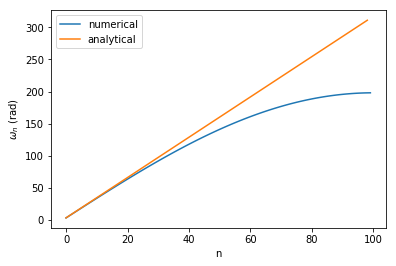

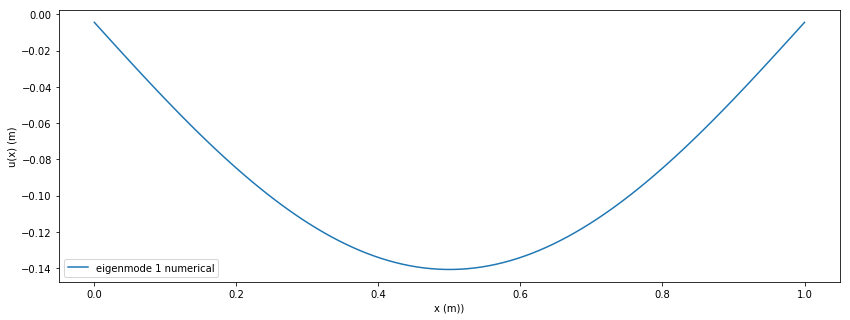

In [15]:
#finding the frequencies 
eigvalues, eigvectors = np.linalg.eig(M)

#plot an eigenmodes
eigvectors_sort = eigvectors[:,np.argsort(eigvalues)] 

#eigenvalues are omega^2
omegas_sorted = np.sort(np.sqrt(eigvalues))

#Make amplitude 1, this is undetermined by the equations, so allowed
eigvectors/= -np.max(eigvectors)

#plot the eigenvalues
plt.plot(omegas_sorted, label = "numerical")
plt.plot(np.arange(1,len(omegas_sorted))*c*np.pi/(x1-x0), label = "analytical")
plt.xlabel("n")
plt.ylabel("$\omega_n$ (rad)")
plt.legend()
plt.show()


k = 1 #plotting index
plt.figure(figsize = (14,5))
plt.plot(x, eigvectors_sort[:,k-1],label = f"eigenmode {k} numerical")
#plt.plot(x, np.sin(k* np.pi/(x1-x0)*x), label = f"eigenmode {k} analytical")
plt.xlabel("x (m))")
plt.ylabel("u(x) (m)")
plt.legend()
plt.show()

# Now let's make the stiffness coefficient vary

The general wave equation is derived from the equation of motion

\begin{equation} \label{eq:eq_of_motion}
\frac{\partial T}{\partial x} = \rho \frac{\partial^2 u}{\partial t^2}, 
\end{equation}

where $T, x, u$ and $t$ denote the stress, position, displacement and time. Consider Hooke's law

$T = c \frac{\partial u }{\partial x}$

where $c$ is the stiffness coefficient. If we substitute this equation into equation \eqref{eq_of_motion}(above) and assume $c$ to vary with $x$, we obtain 

\begin{equation} \label{eq:hooke_substituted}
\frac{\partial^2 u}{\partial t^2} = \frac{1}{\rho} \left( c_{,x} \frac{\partial u }{\partial x} + c \frac{\partial^2 u }{\partial x^2} \right)
\end{equation}

where the comma followed by a $x$ denotes If we assume the modes to be stationary, we can substitute $u(x,t) = u(x) e^{i \omega t}$ into equation \ref{eq:hooke_substituted} and divide by $e^{i \omega t}$ to obtain:

\begin{equation}
\omega^2 u = - \frac{1}{\rho} \left( c_{,x} \frac{\partial u }{\partial z} + c \frac{\partial^2 u }{\partial z^2} \right)
\end{equation}

Which we can solve numerically by writing it as an eigenvalue problem with matrix $A$ and vector $\mathbf{u}$, where $\mathbf{u} = (u_0, u_1, \dots, u_{N-1})^T$. 

\begin{equation}\label{eq:numeric_eigval_problem}
\omega^2 \mathbf{u} = A \mathbf{u}
\end{equation}




In [464]:
#Number of points 
N = 1000

#Range 
x0 = 0 
x1 = 1

#create x array
x = np.linspace(x0,x1,N)

#Determine the spacing
dx = x[1] - x[0]

#switch point
xs = 0.5

#stiffness
rho = np.ones(N)
c = np.ones(N)
switch_i = np.where(x>xs)
c[switch_i] = 2

#compute derivative
c_p = (c[2:] - x[:-2]) / (2*dx)

#slice because the b.c. points are not in the state vector
c = c[1:-1]
rho = rho[1:-1]

#1D laplacian with neumann BC
lapl1D_neu =  np.eye(N-2,k=-1) - 2*np.eye(N-2) + np.eye(N-2,k=1)
lapl1D_neu[0,0] = -1; lapl1D_neu[-1,-1] = -1
lapl1D_neu /= dx**2

#1D gradient with neumann BC
grad1D_neu = np.eye(N-2,k=1) - np.eye(N-2,k=-1)
grad1D_neu[0,0] = -1; grad1D_neu[-1,-1] = 1
grad1D_neu /= (2*dx)


#make the complete matrix
M = -1/rho[:,None] * (c_p[:,None]*grad1D_neu) + (c[:,None] * lapl1D_neu)

print(M)

[[ -748500.75   748500.75        0.   ...        0.          0.
         0.  ]
 [ 1247251.5  -1996002.     748750.5  ...        0.          0.
         0.  ]
 [       0.    1247001.75 -1996002.   ...        0.          0.
         0.  ]
 ...
 [       0.          0.          0.   ... -3992004.    1745502.75
         0.  ]
 [       0.          0.          0.   ...  2246251.5  -3992004.
   1745752.5 ]
 [       0.          0.          0.   ...        0.    2246001.75
  -2246001.75]]


<font color = "blue">Here I use the equations given in lecture 4 of the course TW3730TU<font color = "black">

In [468]:
#Number of points 
N = 1000

#Range 
x0 = 0 
x1 = 1

#create x array
x = np.linspace(x0,x1,N)

#Determine the spacing
dx = x[1] - x[0]

#switch point
xs = 0.5

#stiffness
rho = np.ones(N)
c = np.ones(N)
switch_i = np.where(x>xs)
c[switch_i] = 2
rho[switch_i] = 4
#compute derivative
a = (c[1:] + c[:-1]) / 2

#slice because the b.c. points are not in the state vector
c = c[1:-1]
rho = rho[1:-1]

#1D laplacian with neumann BC
main = - a[:-1] - a[1:]
main[0] = -a[1]; main[-1] = -a[-2]
off = a[1:-1]

M = -1 / (dx**2 * rho[:,None]) * (np.diag(main, k=0) + np.diag(off,k=1) + np.diag(off,k=-1))
M += M.T.conj(); M /= 2


print(M)

[[ 998001.  -998001.       -0.  ...      -0.       -0.       -0. ]
 [-998001.  1996002.  -998001.  ...      -0.       -0.       -0. ]
 [     -0.  -998001.  1996002.  ...      -0.       -0.       -0. ]
 ...
 [     -0.       -0.       -0.  ...  998001.  -499000.5      -0. ]
 [     -0.       -0.       -0.  ... -499000.5  998001.  -499000.5]
 [     -0.       -0.       -0.  ...      -0.  -499000.5  499000.5]]


/Users/samkatiraee-far/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


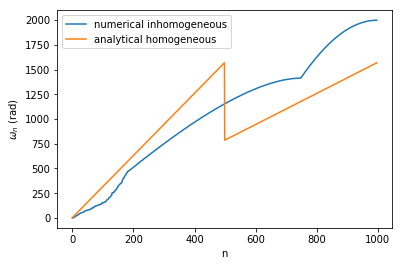

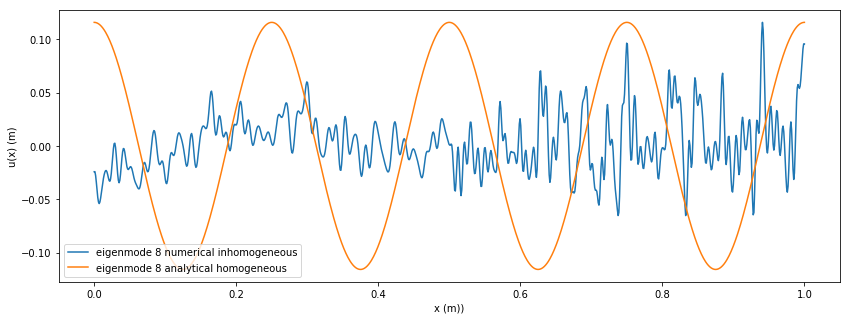

In [469]:
#finding the frequencies 
eigvalues, eigvectors = np.linalg.eig(M)

#plot an eigenmodes
eigvectors_sort = eigvectors[:,np.argsort(eigvalues)] 
eigvectors_sort = np.concatenate(([eigvectors_sort[0]],eigvectors_sort,[eigvectors_sort[-1]]))

#eigenvalues are omega^2
omegas_sorted = np.sort(np.sqrt(eigvalues))

#Make amplitude 1, this is undetermined by the equations, so allowed
eigvectors/= -np.max(eigvectors)
eigvectors = np.concatenate(([eigvectors[0]],eigvectors,[eigvectors[-1]]))

#plot the eigenvalues
plt.plot(omegas_sorted, label = "numerical inhomogeneous")
plt.plot(np.arange(1,len(omegas_sorted)+1)*c/rho*np.pi/(x1-x0), label = "analytical homogeneous")
plt.xlabel("n")
plt.ylabel("$\omega_n$ (rad)")
plt.legend()
plt.show()


k = 8 #plotting index
plt.figure(figsize = (14,5))
plt.plot(x, -eigvectors_sort[:,k],label = f"eigenmode {k} numerical inhomogeneous")
plt.plot(x, np.max(np.abs(eigvectors_sort[:,k])) * np.cos(k* np.pi/(x1-x0)*x), label = f"eigenmode {k} analytical homogeneous")
plt.xlabel("x (m))")
plt.ylabel("u(x) (m)")
plt.legend()
plt.show()

# Use generalized eigenvalue solver from scipy

Set up all the matrices

In [22]:
import numpy as np
import matplotlib.pylab as plt
from time import time
import scipy.linalg as la

In [23]:
#Number of points 
N = 1000

#Range 
x0 = 0 
x1 = 500e-6

#create x array
x = np.linspace(x0,x1,N)

#Determine the spacing
dx = x[1] - x[0]

#switch point
xs = (x1-x0)/2

#stiffness
rho = np.ones(N)
c = np.ones(N)
switch_i = np.where(x>xs)
c[switch_i] = 2
rho[switch_i] = 4
#compute derivative
a = (c[1:] + c[:-1]) / 2

#slice because the b.c. points are not in the state vector
c = c[1:-1]
rho = rho[1:-1]

#FD varying coefficient
main = - a[:-1] - a[1:]
main[0] = -a[1]; main[-1] = -a[-2]
off = a[1:-1]

#make the LHS matrix
M = 1 / (dx**2) * (np.diag(main, k=0) + np.diag(off,k=1) + np.diag(off,k=-1))

#make the matrix with rho on diagonal
RHO = np.diag(rho,k=0)

Now use the generalized eigenproblem solver 

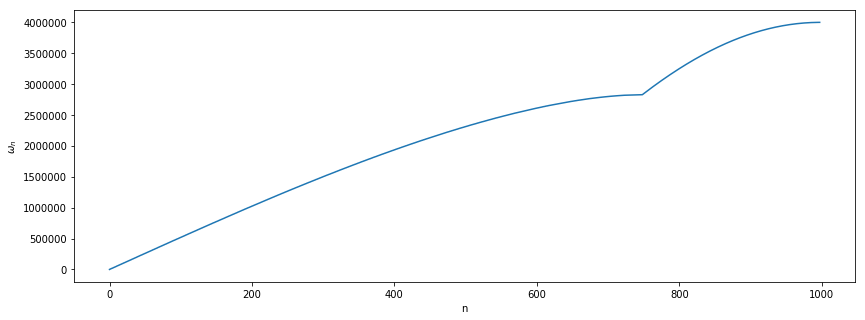

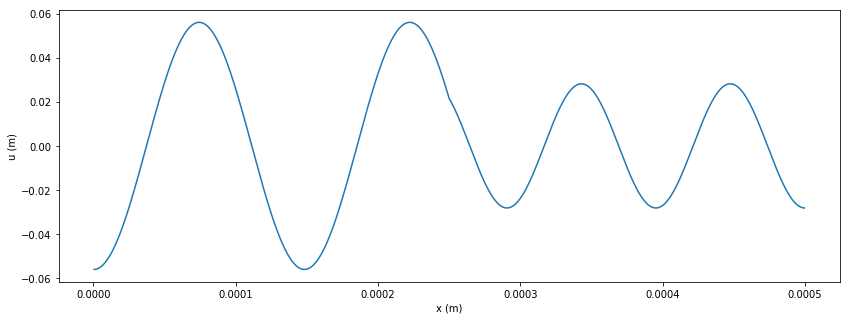

In [24]:
#find the values and vectors from the generalized eigenvalue solver
eigvals, eigvecs = la.eig(a = M, b=-RHO)

#sort them
vecs_sort = eigvecs[:,np.argsort(eigvals)]
freq_sort = np.sort(np.sqrt(eigvals))

#plot eigenfrequencies
plt.figure(figsize=(14,5))
plt.plot(freq_sort.real)
plt.xlabel("n")
plt.ylabel("$\omega_n$")
plt.show()

#plot eigenvectors
plt.figure(figsize=(14,5))
plt.plot(x[1:-1],vecs_sort[:,8])
plt.xlabel("x (m)")
plt.ylabel("u (m)")
plt.show()